In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
pd.set_option('display.max_rows', None)

In [5]:
filepath = r'C:\Users\Jason Sjafrudin\Desktop\WiDS\training.csv'

In [3]:
df_train = pd.read_csv(filepath)
print(df_train.head())


   patient_id patient_race  payer_type patient_state  patient_zip3  \
0      475714          NaN    MEDICAID            CA           924   
1      349367        White  COMMERCIAL            CA           928   
2      138632        White  COMMERCIAL            TX           760   
3      617843        White  COMMERCIAL            CA           926   
4      817482          NaN  COMMERCIAL            ID           836   

   patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0           84              F    NaN                       C50919   
1           62              F  28.49                       C50411   
2           43              F  38.09                       C50112   
3           45              F    NaN                       C50212   
4           55              F    NaN                         1749   

                        breast_cancer_diagnosis_desc  ...   disabled  \
0  Malignant neoplasm of unsp site of unspecified...  ...  12.871429   
1  Malig neoplm of u

In [5]:
## EDA

In [85]:
df_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

In [10]:
print("Dimensions of training data :",df_train.shape)
print("----------------------------------------------------------------------------")
print("Dimensions of test data :",df_test.shape)
print("----------------------------------------------------------------------------")
print("Test and Train data split % : ",round((len(df_test)/len(df_train))*100,0))

Dimensions of training data : (12906, 83)
----------------------------------------------------------------------------
Dimensions of test data : (5792, 82)
----------------------------------------------------------------------------
Test and Train data split % :  45.0


In [119]:
12906+5792

18698

In [11]:
print("Train data Info :",df_train.info())
print("----------------------------------------------------------------------------")
print("Test data Info :",df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 83 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient_id                             12906 non-null  int64  
 1   patient_race                           6521 non-null   object 
 2   payer_type                             11103 non-null  object 
 3   patient_state                          12855 non-null  object 
 4   patient_zip3                           12906 non-null  int64  
 5   patient_age                            12906 non-null  int64  
 6   patient_gender                         12906 non-null  object 
 7   bmi                                    3941 non-null   float64
 8   breast_cancer_diagnosis_code           12906 non-null  object 
 9   breast_cancer_diagnosis_desc           12906 non-null  object 
 10  metastatic_cancer_diagnosis_code       12906 non-null  object 
 11  me

In [27]:
print("Proportion of Missing values in Train data")
print(pd.concat([df_train.isnull().sum(), round(df_train.isnull().sum()/len(df_train)*100,2)], axis=1, keys=['Null Count', 'Percentage']))

Proportion of Missing values in Train data
                                       Null Count  Percentage
patient_id                                      0        0.00
patient_race                                 6385       49.47
payer_type                                   1803       13.97
patient_state                                  51        0.40
patient_zip3                                    0        0.00
patient_age                                     0        0.00
patient_gender                                  0        0.00
bmi                                          8965       69.46
breast_cancer_diagnosis_code                    0        0.00
breast_cancer_diagnosis_desc                    0        0.00
metastatic_cancer_diagnosis_code                0        0.00
metastatic_first_novel_treatment            12882       99.81
metastatic_first_novel_treatment_type       12882       99.81
Region                                         52        0.40
Division                   

In [28]:
print("Proportion of Missing values in Test data")
print(pd.concat([df_test.isnull().sum(), round(df_test.isnull().sum()/len(df_test)*100, 2)], axis=1, keys=['Null Count', 'Percentage']))

Proportion of Missing values in Test data
                                       Null Count  Percentage
patient_id                                      0        0.00
patient_race                                 2901       50.09
payer_type                                    760       13.12
patient_state                                  21        0.36
patient_zip3                                    0        0.00
patient_age                                     0        0.00
patient_gender                                  0        0.00
bmi                                          4015       69.32
breast_cancer_diagnosis_code                    0        0.00
breast_cancer_diagnosis_desc                    0        0.00
metastatic_cancer_diagnosis_code                0        0.00
metastatic_first_novel_treatment             5781       99.81
metastatic_first_novel_treatment_type        5781       99.81
Region                                         21        0.36
Division                    

In [ ]:
# Features like metastatic_first_novel_treatment and metastatic_first_novel_treatment_type have extremely high 
# missing values (99.81%).Missing value in these columns means that there has been no treatment previously or 
# that the data is not available
# Features like patient_race, payer_type, and Region have moderate missing values (around 13.97% to 49.47%)

In [111]:
columns_to_exclude = ['patient_id', 'DiagPeriodL90D']
numerical_columns = df_train.select_dtypes(include='number').columns.difference(columns_to_exclude)
round(df_train[numerical_columns].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
N02,12877.0,16.10,5.84,2.76,11.28,15.59,20.80,31.50
Ozone,12877.0,39.82,3.56,30.94,37.70,39.11,41.14,52.24
PM25,12877.0,7.48,1.52,2.64,6.65,7.69,8.28,11.17
age_10_to_19,12905.0,12.95,1.92,6.31,11.74,12.92,14.02,35.30
age_20s,12905.0,13.29,3.35,5.92,11.01,12.54,14.97,62.10
age_30s,12905.0,12.86,2.32,1.50,11.29,12.44,14.03,25.47
age_40s,12905.0,12.07,1.25,0.80,11.34,12.12,12.89,17.82
age_50s,12905.0,13.44,1.64,0.00,12.30,13.57,14.58,21.66
age_60s,12905.0,12.62,2.57,0.20,10.62,12.53,13.99,29.85
age_70s,12905.0,7.65,2.15,0.00,6.01,7.32,8.79,19.00


In [118]:
iqr_values = df_train[numerical_columns].quantile(0.75) - df_train[numerical_columns].quantile(0.25)
iqr_df = pd.DataFrame({'Variable': iqr_values.index, 'IQR': iqr_values.values})
iqr_df = iqr_df.sort_values(by='IQR', ascending=False)
iqr_df

,Variable,IQR
32,home_value,238121.795500
44,income_household_median,22254.546670
55,population,20557.382138
47,income_individual_median,8373.254370
33,housing_units,7492.444441
15,density,1494.658242
65,rent_median,610.609635
54,patient_zip3,515.000000
63,race_white,28.820000
30,hispanic,23.280196


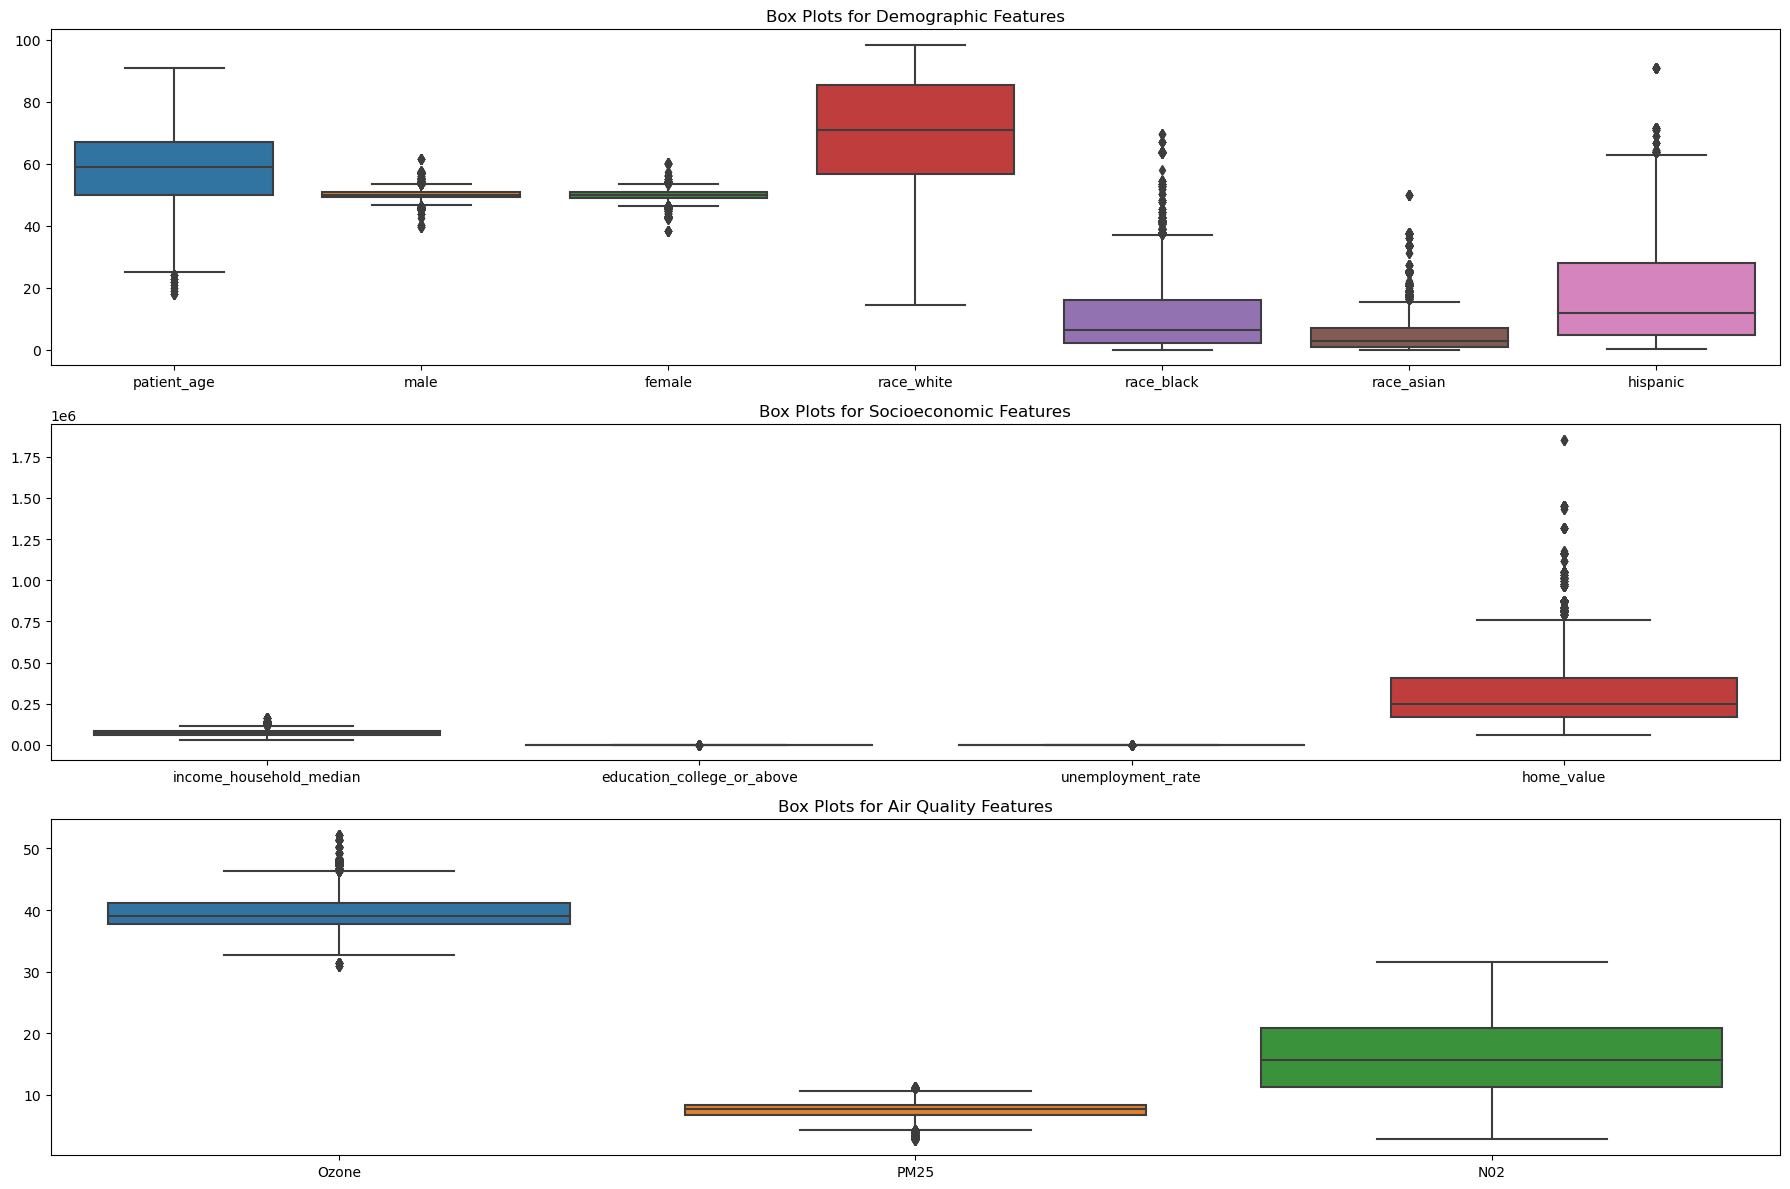

In [115]:
# Group numerical columns into different subsets based on your criteria
demographic_columns = ['patient_age', 'male', 'female', 'race_white', 'race_black', 'race_asian', 'hispanic']
socioeconomic_columns = ['income_household_median', 'education_college_or_above', 'unemployment_rate', 'home_value']
air_quality_columns = ['Ozone', 'PM25', 'N02']

# Set the size of the plot
plt.figure(figsize=(18, 12))

# Create separate box plots for different subsets
plt.subplot(3, 1, 1)
sns.boxplot(data=df_train[demographic_columns])
plt.title('Box Plots for Demographic Features')

plt.subplot(3, 1, 2)
sns.boxplot(data=df_train[socioeconomic_columns])
plt.title('Box Plots for Socioeconomic Features')

plt.subplot(3, 1, 3)
sns.boxplot(data=df_train[air_quality_columns])
plt.title('Box Plots for Air Quality Features')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Insights:

# The age distribution is right-skewed, with a higher mean than the median, suggesting a few older patients with relatively higher ages.
# The BMI column has missing values, and their treatment should be considered.
# The population and density columns also have missing values.
# Health-related factors exhibit variability, and further analysis may be needed to understand their impact.

In [84]:
## Categorical variables
def get_unique_categorical_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    unique_values_dict = {col: df[col].unique() for col in categorical_columns}
    return unique_values_dict

unique_categorical_values_train = get_unique_categorical_values(df_train)
unique_categorical_values_train

{'patient_race': array([nan, 'White', 'Other', 'Hispanic', 'Asian', 'Black'], dtype=object),
 'payer_type': array(['MEDICAID', 'COMMERCIAL', 'MEDICARE ADVANTAGE', nan], dtype=object),
 'patient_state': array(['CA', 'TX', 'ID', 'NY', 'IL', nan, 'MI', 'OR', 'MT', 'KY', 'OH',
        'IN', 'FL', 'CO', 'GA', 'VA', 'MD', 'KS', 'WI', 'PA', 'NM', 'WA',
        'MN', 'NC', 'AL', 'SC', 'LA', 'IA', 'TN', 'HI', 'NE', 'AZ', 'MO',
        'NV', 'SD', 'DC', 'AR', 'UT', 'WV', 'ND', 'OK', 'WY', 'DE', 'NJ',
        'MS', 'AK', 'PR', 'RI', 'CT', 'NH', 'MA'], dtype=object),
 'patient_gender': array(['F'], dtype=object),
 'breast_cancer_diagnosis_code': array(['C50919', 'C50411', 'C50112', 'C50212', '1749', 'C50912', 'C50512',
        '1744', 'C50412', 'C50812', 'C50911', 'C50312', 'C50311', 'C50111',
        '1741', 'C5091', 'C50811', '1748', 'C50511', '1743', 'C50211',
        'C50011', 'C5051', 'C50012', 'C50419', '1742', 'C50611', 'C50612',
        'C50119', 'C50819', '1746', 'C5041', 'C50619', '19881

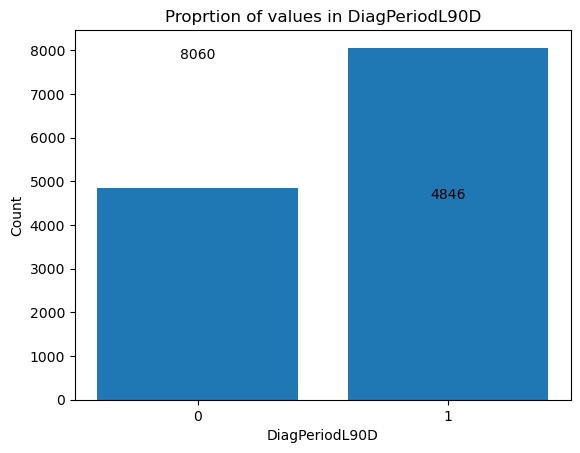

In [83]:
data = df_train["DiagPeriodL90D"].value_counts()
# Creating a bar chart with only 0 and 1 on the x-axis
plt.bar(data.index, data.values)
# Adding data labels to the bars
for i, value in enumerate(data.values):
    plt.text(i, value, str(value), ha='center', va='top')
# Adding labels and title
plt.xlabel("DiagPeriodL90D")
plt.ylabel("Count")
plt.title("Proprtion of values in DiagPeriodL90D")
plt.xticks([0, 1])
plt.show()

In [ ]:
# Technique 1 : Oversampling / Undersampling
# Technique 2 : Random Forests, Gradient Boosting (e.g., XGBoost, AdaBoost), and ensemble methods can be effective.

In [86]:
df_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

### Feature Correlation

In [74]:
# Select the column of interest
column_of_interest = 'DiagPeriodL90D'
# Exclude "patient_id" from the dataframe
df_subset = df_train.drop(columns=['patient_id'])
# Calculate the correlation of all columns with the specified column
correlation_matrix = df_subset.corr()
# Extract correlations with the target column
correlation_with_target = correlation_matrix[[column_of_interest]]
print(correlation_with_target)

                             DiagPeriodL90D
patient_zip3                       0.036372
patient_age                        0.055634
bmi                               -0.005710
population                        -0.006576
density                           -0.017286
age_median                        -0.000405
age_under_10                      -0.008986
age_10_to_19                      -0.015172
age_20s                            0.003433
age_30s                            0.019208
age_40s                            0.020943
age_50s                           -0.010447
age_60s                           -0.001002
age_70s                           -0.003296
age_over_80                       -0.009751
male                               0.009984
female                            -0.009982
married                            0.008849
divorced                           0.000968
never_married                     -0.002490
widowed                           -0.031544
family_size                     

/var/folders/ld/q1czxsbd2fl10zwy_z_flk3h0000gn/T/ipykernel_28403/2888725429.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_subset.corr()


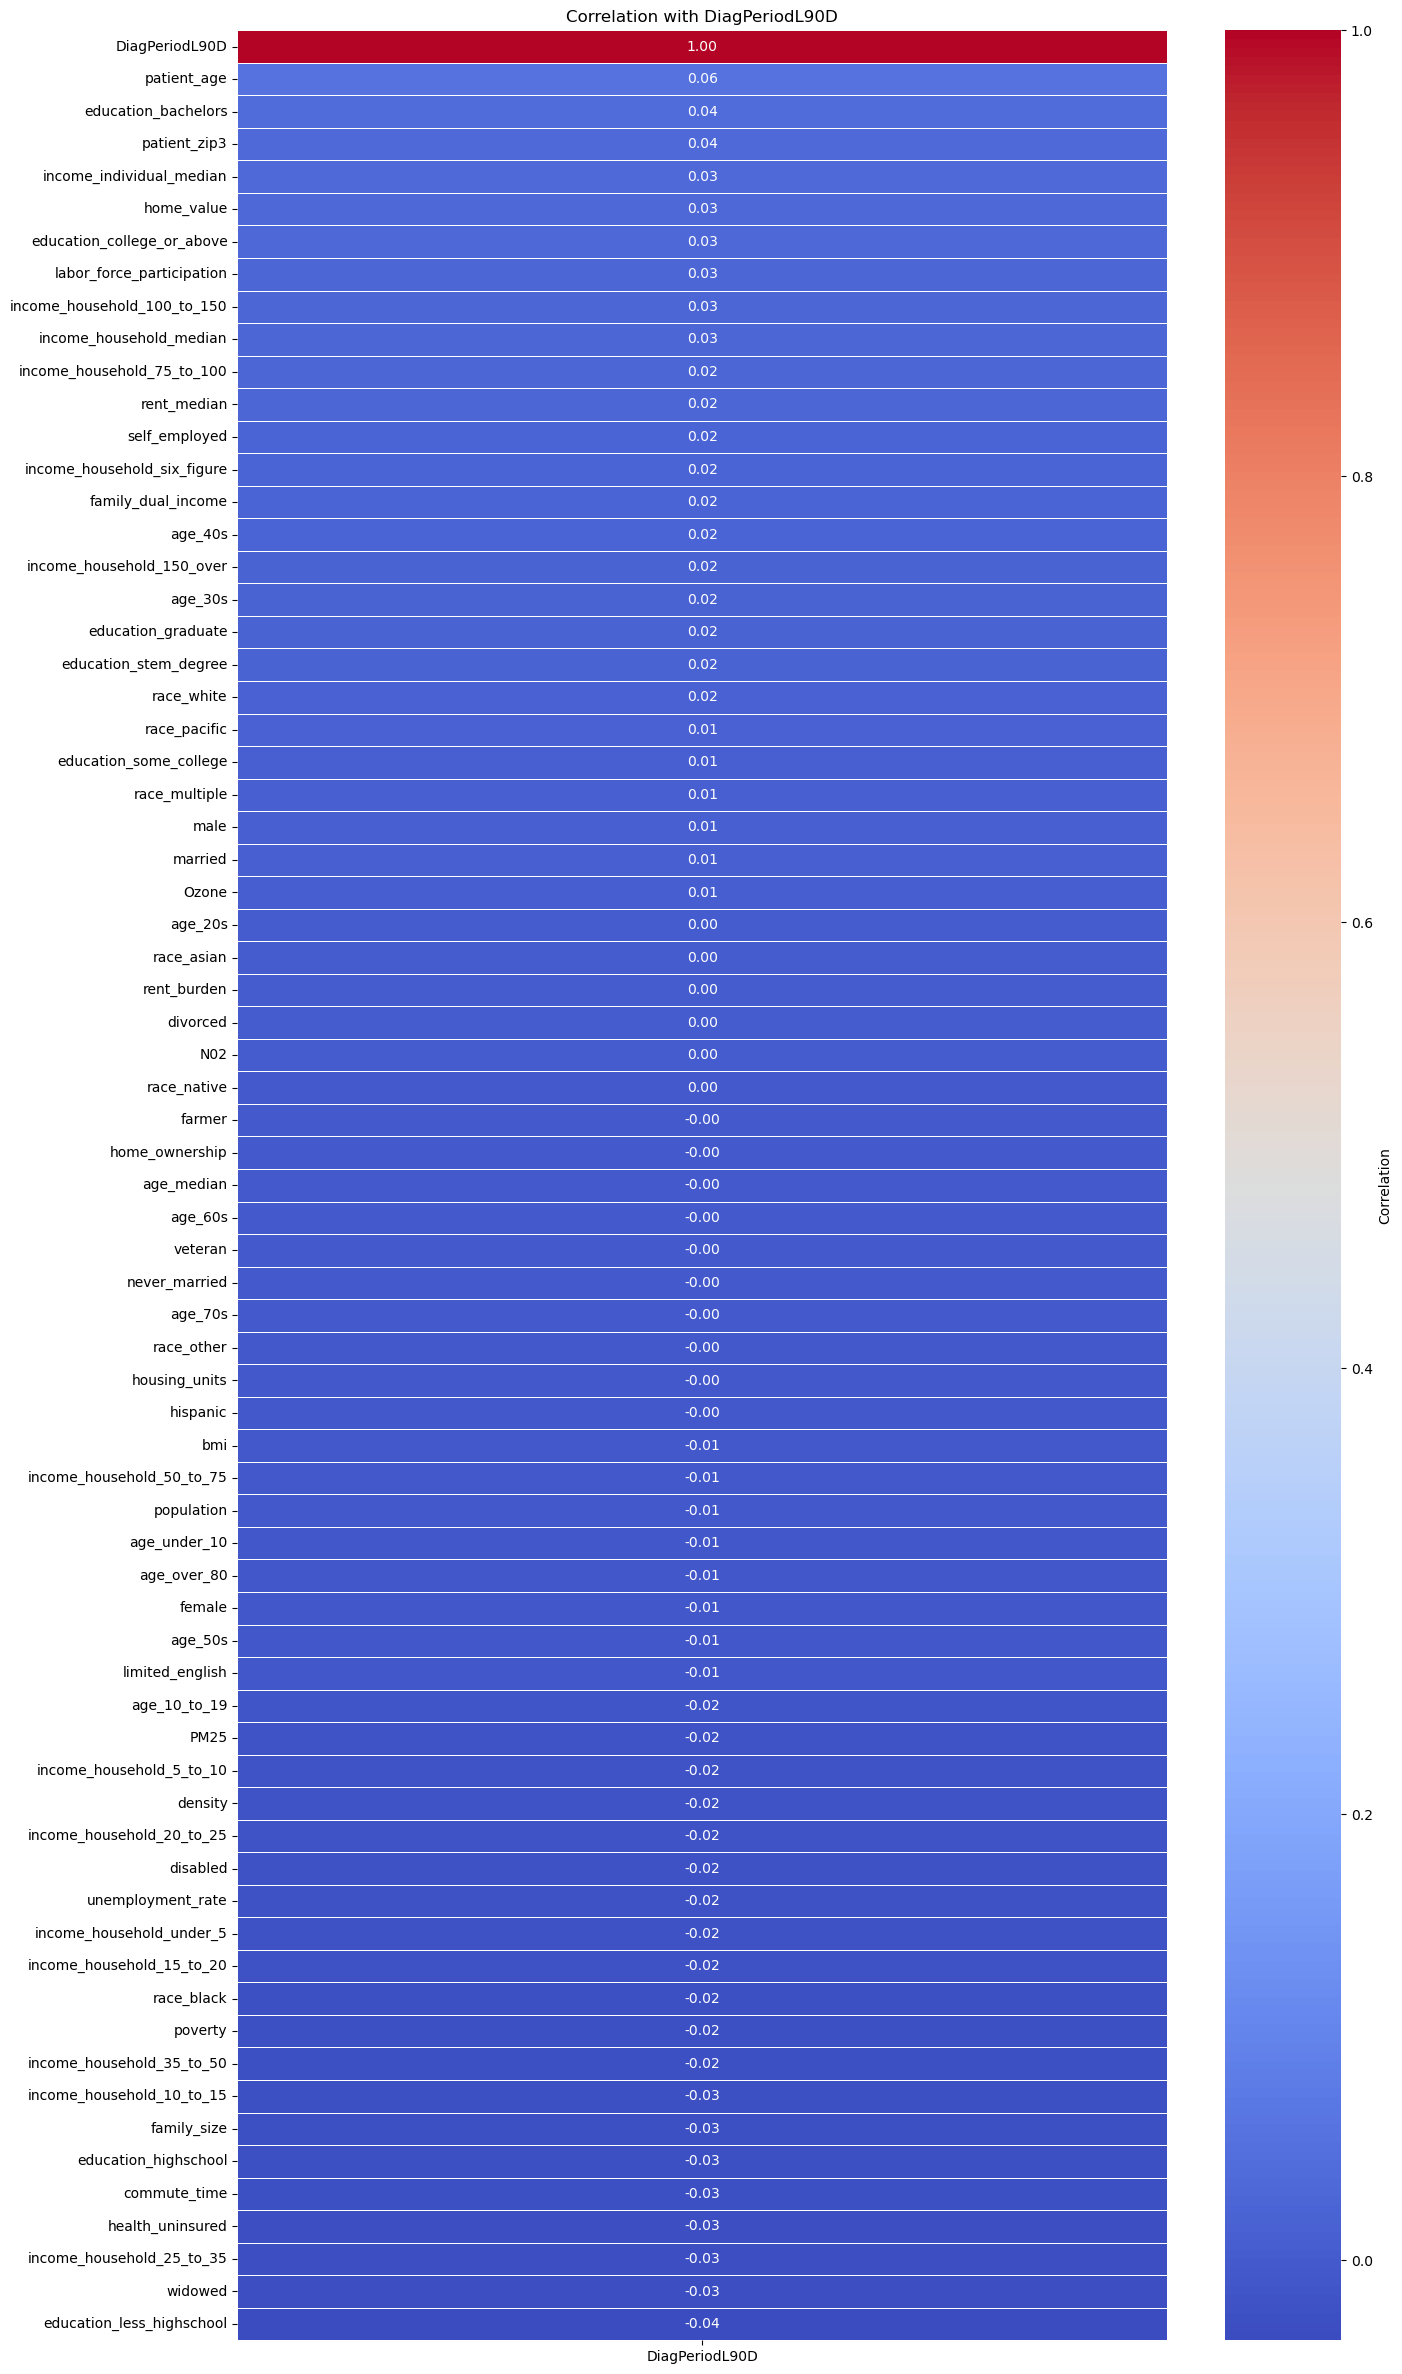

In [75]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 30))
sns.heatmap(correlation_with_target.sort_values(by=column_of_interest, ascending=False),
            annot=True,
            cmap='coolwarm',
            cbar_kws={'label': 'Correlation'},
            linewidths=.5,
            fmt='.2f')

plt.title(f'Correlation with {column_of_interest}')
plt.show()

### Demographic Analysis

DiagPeriodL90D     0     1
patient_race              
Asian            135   230
Black            408   648
Hispanic         305   524
Other            255   428
White           1223  2365


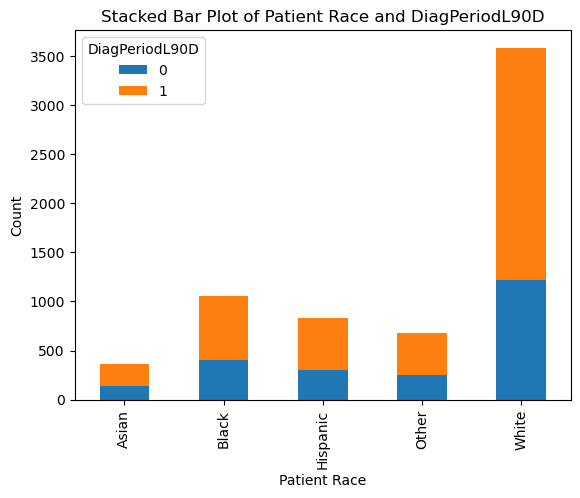

In [54]:
df_plot = df_train.groupby(['patient_race', 'DiagPeriodL90D']).size().unstack(fill_value=0)
print(df_plot)
# Plotting
fig, ax = plt.subplots()
df_plot.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Patient Race')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Patient Race and DiagPeriodL90D')

# Show the plot
plt.show()

DiagPeriodL90D Age Range     0     1
0                  18-27    19    67
1                  28-37   227   320
2                  38-47   740  1025
3                  48-57  1346  2093
4                  58-67  1457  2519
5                  68-77   616  1166
6                  78-87   385   664
7                  88-97    56   206


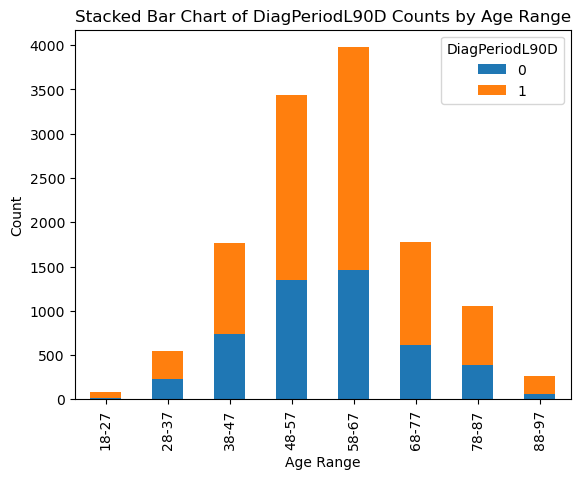

In [55]:
df_plot_age = pd.DataFrame(df_train.groupby(['patient_age', 'DiagPeriodL90D']).size().unstack(fill_value=0).reset_index())
bins = [18, 28, 38, 48, 58, 68, 78, 88, 98]
labels = [f"{i}-{i+9}" for i in range(18, 98, 10)]

# Assuming 'patient_age' is a column in df_plot, replace it with the actual column name if different
df_plot_age['Age Range'] = pd.cut(df_plot_age['patient_age'], bins=bins, labels=labels, right=False)

# Group by age range and sum the counts
df_plot_age_agg = df_plot_age.groupby('Age Range').agg({0: 'sum', 1: 'sum'}).reset_index()
print(df_plot_age_agg)
# Plotting the stacked bar chart
df_plot_age_agg.plot(x='Age Range', kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Adding labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of DiagPeriodL90D Counts by Age Range')

# Display the plot
plt.show()

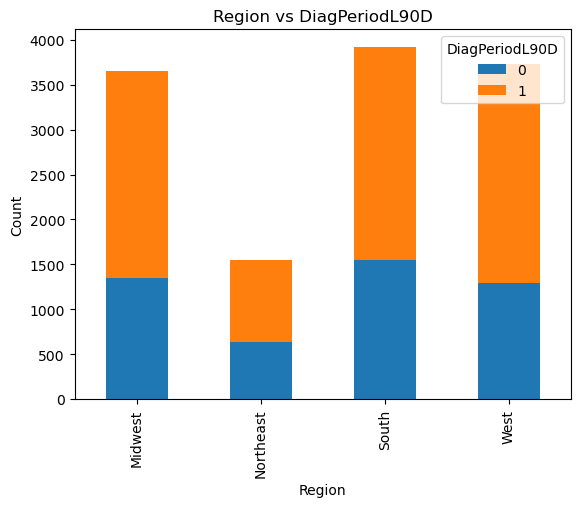

In [95]:
df_plot_geo = pd.DataFrame(df_train.groupby(['Region', 'DiagPeriodL90D']).size().unstack(fill_value=0))

# Plotting
fig, ax = plt.subplots()
df_plot_geo.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region vs DiagPeriodL90D')

# Show the plot
plt.show()

In [98]:
df_train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'Region', 'Division',
       'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19',
       'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'in

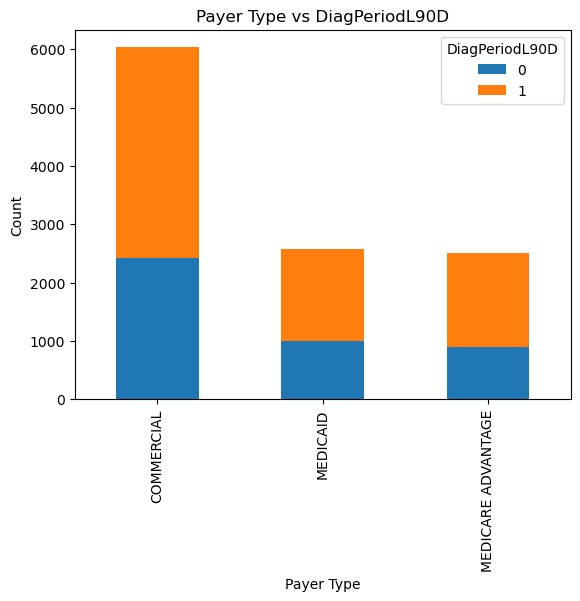

In [100]:
df_plot_payer_type = pd.DataFrame(df_train.groupby(['payer_type', 'DiagPeriodL90D']).size().unstack(fill_value=0))
# Plotting
fig, ax = plt.subplots()
df_plot_payer_type.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title
plt.xlabel('Payer Type')
plt.ylabel('Count')
plt.title('Payer Type vs DiagPeriodL90D')

# Show the plot
plt.show()

In [ ]:
## NAN : NO INSURANCE